In [1]:
import xarray as xr
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
from cartopy import feature as cfeat
from metpy.plots import USCOUNTIES
import numpy as np
from pyxlma import coords

In [26]:
CONUS_bounds = [-170, 10, -75, 75]
lon = np.linspace(CONUS_bounds[0], CONUS_bounds[1], 1000)
lat = np.linspace(CONUS_bounds[2], CONUS_bounds[3], 1000)

lon2d, lat2d = np.meshgrid(lon, lat)

In [27]:
satsys = coords.GeostationaryFixedGridSystem(subsat_lon=-75.19999694824219, sweep_axis='x')#, ellipse=ltg_ell)
geosys = coords.GeographicSystem()

In [28]:
ecef_grid = geosys.toECEF(lon2d, lat2d, np.zeros_like(lon2d))
sat_x, sat_y, _ = satsys.fromECEF(*ecef_grid)

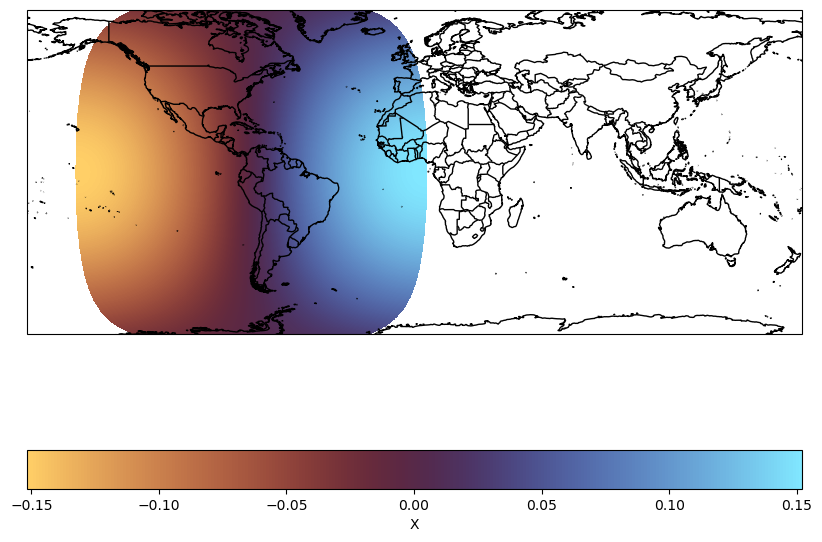

In [29]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
pcm = ax.pcolormesh(lon, lat, sat_x, transform=ccrs.PlateCarree(), cmap='managua')
# ax.add_feature(USCOUNTIES.with_scale('5m'), edgecolor='gray', linewidth=0.5)
ax.add_feature(cfeat.COASTLINE.with_scale('50m'))
ax.add_feature(cfeat.BORDERS, linewidth=1, edgecolor='black')
ax.set_extent([-179, 179, -75, 75], crs=ccrs.PlateCarree())
fig.colorbar(pcm, orientation='horizontal', label='X')

good that works then